## Evaluating Mixture model of group and individual
Using MDTB leave-one-subject-out models and individuals:
- Does the mixture perform better on that subject?
- What is the performance gain?
- What is the optimal mixing parameter?

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import cortico_cereb_connectivity.run_model as rm
import cortico_cereb_connectivity.globals as gl
import matplotlib.pyplot as plt

In [2]:
train_names = ["WfIbDeNiSoScLa", "MdWfIbDeNiSoSc", "MdWfIbDeNiSoLa", "MdIbDeNiSoScLa", "MdWfIbNiSoScLa", "MdWfIbDeNiScLa", "MdWfIbDeSoScLa", "MdWfDeNiSoScLa"]
eval_ds_list = ["MDTB", "Language", "Social", "WMFS", "Demand", "Somatotopic", "Nishimoto", "IBC"]
eval_names = ["MDTB", "Languagelocalizer", "Socialsocial", "WMFS", "Demand", "Somatotopic", "Nishimoto", "IBC"]
logalpha_list = [8, 8, 8, 8, 8, 10, 10, 6]

df_mix = pd.DataFrame()
for td, ed, la in zip(train_names, eval_names, logalpha_list):
    df = rm.comb_eval(models=[f'{td}-mix-Cind'], eval_data=[ed], methods=['L2reg'], cerebellum='MNISymC3')
    df_mix = pd.concat([df_mix, df], ignore_index=True)

df_mix['group_noiseceil_Y'] = (df_mix['group_noiseceil_Y_upper']+df_mix['group_noiseceil_Y_lower']) / 2
df_mix['R_eval_normalized'] = df_mix['R_eval'] / df_mix['group_noiseceil_Y']

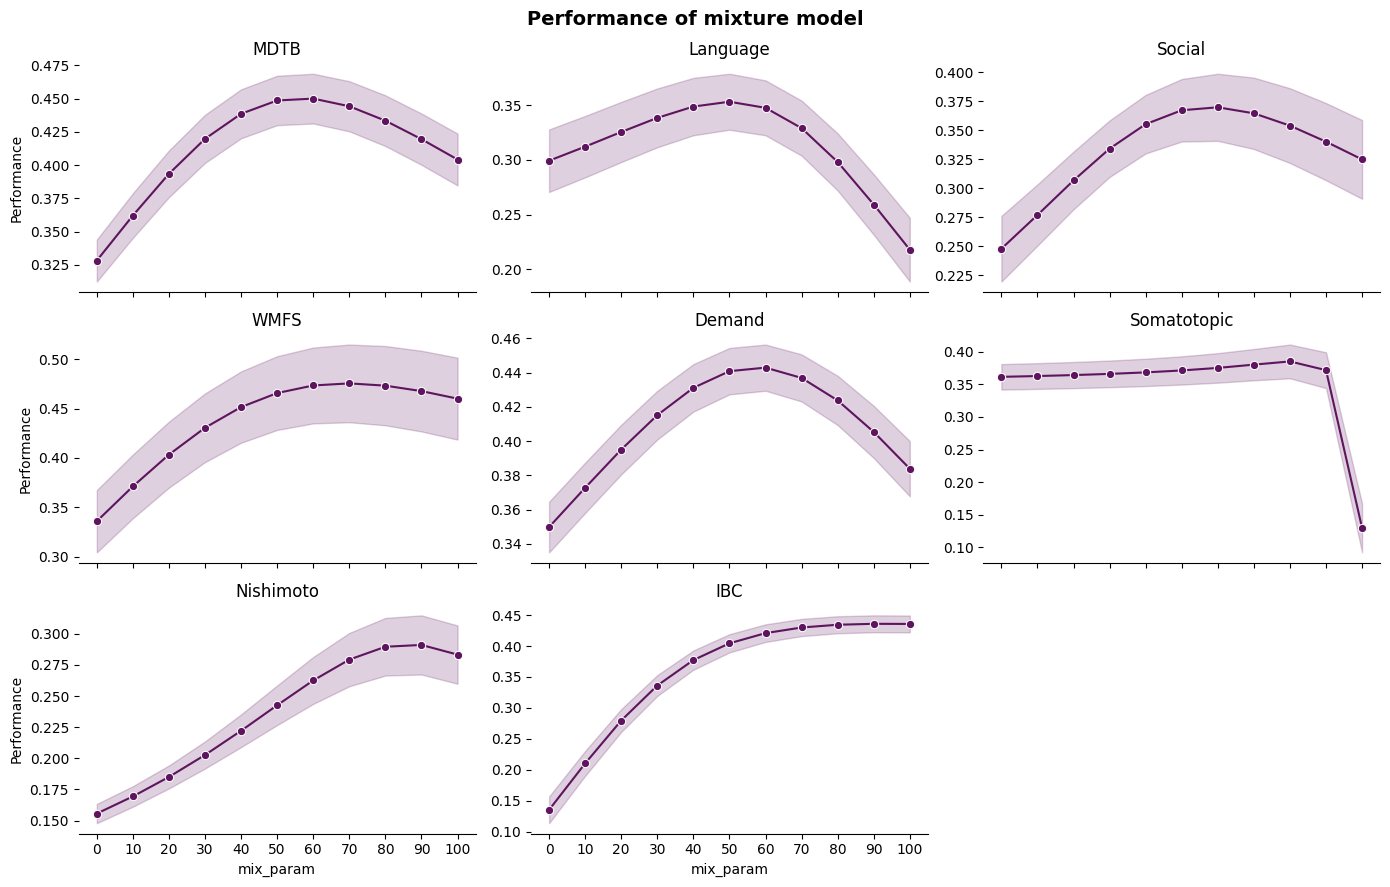

In [3]:
colors = ["#5e145e", "#3275a1", "#3a923a", "#c03d3e"]

# plotting the mixed model performance
fig, axes = plt.subplots(3,3,figsize=(14,9), sharex='col')

for i, ds in enumerate(eval_ds_list):
    df_mix_subset = df_mix[df_mix['eval_dataset']==ds]

    ax = axes[i//3, i%3]
    sns.lineplot(data=df_mix_subset, x='mix_param', y='R_eval', errorbar='se', marker='o', color=colors[0], ax=ax)

    # plotting the horizontal lines for comparison
    # ax.axhline(y=df_loo_subset[df_loo_subset['model_type'] == 'loo']['R_eval_normalized'].mean(), color=colors[3], linestyle=':', label='loo')

    # decoration
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.set_xticks(np.linspace(0,100,11))
    # ax.text(x=50,y=df_loo_subset[df_loo_subset['model_type']=='loo']['R_eval_normalized'].mean(),s='loo',color=colors[3],fontweight='bold',horizontalalignment='center',verticalalignment='bottom')
    ax.set_title(f'{ds}')
    if i%3==0:
        ax.set_ylabel('Performance')
    else:
        ax.set_ylabel('')

plt.suptitle('Performance of mixture model', fontsize=14, fontweight='bold');
fig.delaxes(axes[2,2])
plt.tight_layout()

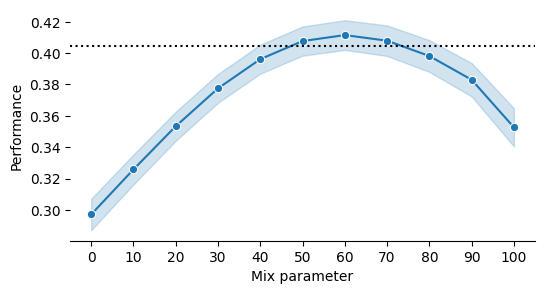

In [12]:
colors = ["#5e145e", "#3275a1", "#3a923a", "#c03d3e"]

# plotting the mixed model performance
fig, ax = plt.subplots(figsize=(6, 3))
sns.lineplot(data=df_mix, x='mix_param', y='R_eval', errorbar='se', marker='o', ax=ax)
ax.set_xlabel('Mix parameter')
ax.set_ylabel('Performance')

# Reference line for group noise ceiling
gnc = df_mix.group_noiseceil_Y.mean()
ax.axhline(y=gnc, color='k', linestyle=':')

# decoration
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.set_xticks(np.linspace(0, 100, 11));
plt.savefig(gl.fig_dir + '/mixture_model_performance.pdf', bbox_inches='tight')